# Distribution of birthdays in Finland

Data from https://www.avoindata.fi/data/en_GB/dataset/syntymapaivien-jakautuminen-kalenterivuodelle

Plot inspiration from: https://stackoverflow.com/a/22568292/7037299

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import matplotlib.ticker as ticker

In [2]:
req = requests.get("https://www.avoindata.fi/data/api/3/action/package_show?id=syntymapaivien-jakautuminen-kalenterivuodelle")
df = pd.read_excel(req.json()["result"]["resources"][0]["url"])

In [3]:
df.rename(columns = {"SYNTYMÄKUUKAUSI":"birthmonth", "SYNTYMAPÄIVÄ":"birthday", "LUKUMÄÄRÄ":"count"}, inplace = True)
# Fake date axis for a given year (unimportant which, but needs to be a leap year, say 2020)
df['birthdate'] = pd.to_datetime("2020-" + df['birthmonth'].astype("str") + "-" + df['birthday'].astype("str"))
max_val = df["count"].max()
min_val = df["count"].min()
print("Maximum value is {} at {}".format(max_val, pd.to_datetime(df.loc[df["count"]==max_val, "birthdate"].values[0]).strftime("%B %d")))
print("Minimum value is {} at {}".format(min_val, pd.to_datetime(df.loc[df["count"]==min_val, "birthdate"].values[0]).strftime("%B %d")))

Maximum value is 26781 at January 01
Minimum value is 4274 at February 29


In [4]:
# Some plot prep
bottom = df['count'].min() - 500
N = df["birthdate"].count()
width = (2*np.pi) / N
max_height = df['count'].max()
df["radii"] = df["count"] - bottom
df.index = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
xlabels = [
    "2020-01-01",
    "2020-02-01",
    "2020-03-01",
    "2020-04-01",
    "2020-05-01",
    "2020-06-01",
    "2020-07-01",
    "2020-08-01",
    "2020-09-01",
    "2020-10-01",
    "2020-11-01",
    "2020-12-01",
]
xticklocs = df[df["birthdate"].isin(xlabels)].index
xlabels = pd.to_datetime(xlabels).strftime("%B %d")
# Second biggest value for color scale max
max_cscale = df["radii"].sort_values(ascending=False).iloc[1]
# Second smallest value for color scale in
min_cscale = df["radii"].sort_values(ascending=True).iloc[1]

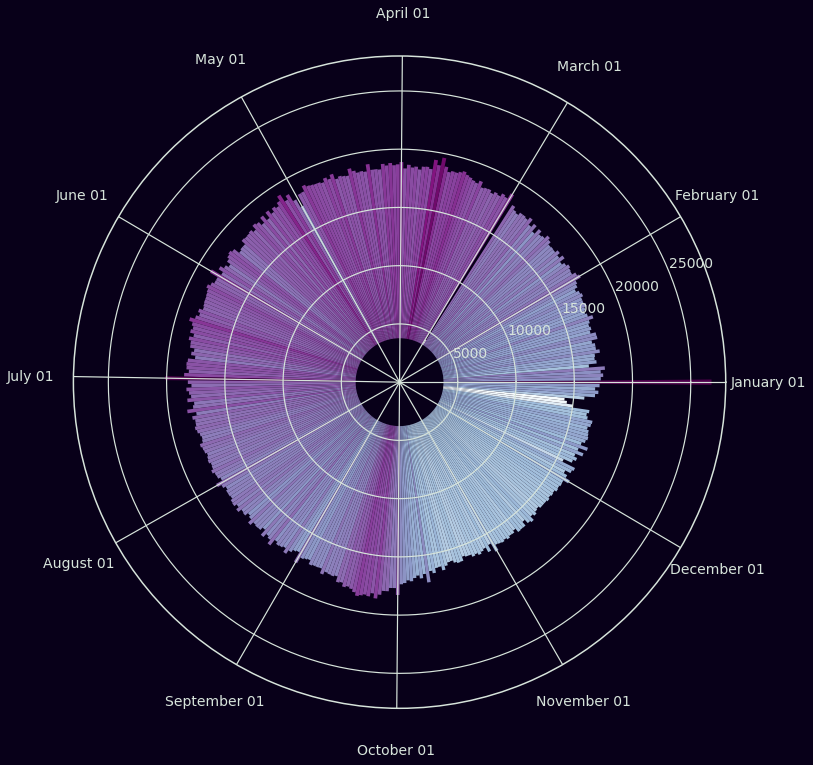

In [13]:
# Plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, polar=True)
bars = ax.bar(df.index, df["radii"], width=width, bottom=bottom)
ax.set_ylim(0, 28000)
ax.xaxis.set_major_locator(ticker.FixedLocator(xticklocs.values))
ax.set_xticklabels(xlabels)
ax.tick_params(axis='x', which='major', labelsize=14, colors="#D7E4DB", pad=32)
ax.tick_params(axis='y', which='major', labelsize=14, colors="#D7E4DB", pad=16)
for crtspine in ['start','polar','end','inner']:
    ax.spines[crtspine].set_linewidth(1.5)
    ax.spines[crtspine].set_color("#D7E4DB")
ax.grid(color='#D7E4DB', linestyle='-', linewidth=1.2)    
fig.patch.set_facecolor("#080019")
ax.set_facecolor("#080019")
for r, bar in zip(df["radii"], bars):
    cscale_current = (r - min_cscale)/(max_cscale - min_cscale)
    if cscale_current < 0:
        cscale_current = 0.00001
    if cscale_current > 1:
        cscale_current = 0.99999
    bar.set_facecolor(plt.cm.BuPu(cscale_current))
    bar.set_alpha(1.00)